# Load modules

ライブラリ読み込み

In [1]:
# ライブラリ読み込み
import sys, os
import time
import gc
from datetime import datetime as dt
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import japanize_matplotlib
import pydotplus as pdp

import re # 正規表現

import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 評価関数
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

%matplotlib inline

D:\Programming\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# 自作関数
from annnmods import *

In [3]:
print_usage()

# 自作関数のディレクトリ構成
以下を想定

analysis/
  ├ NoteBook.ipynb
  ├ Script.py
  │
  └ annnmods/
    ├ analysis.py       # 分析用関数
    ├ calculation.py    # 数値計算用関数
    ├ scraping.py       # スクレイピング用関数
    ├ useful.py         # 便利関数
    ├ visualization.py  # 可視化用関数
    ・
    ・
    └ __init__.py       # 初期化. 全関数をimport.

# 使用方法
## 関数のimport
from annnmods import *
または
import annnmods as am

## 関数の使用方法
print_usage()
または
am.print_usage()

■■■■■■■■■■■■■■■■■■■■
■■■読み込み済みライブラリ一覧■■■■
■■■■■■■■■■■■■■■■■■■■
from .analysis import *
from .calculation import *
from .mod_config import *
from .scraping import *
from .useful import *
from .visualization import *
from IPython.display import Image
from bs4 import BeautifulSoup
from datetime import datetime as dt
from glob import glob
from googletrans import Translator
from pathlib import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score
from sklearn.met

In [4]:
gc.collect()

0

# Configuration

## 左寄せにするマジックコマンド

In [5]:
%%html
<style>
    table{float:left}
    .MathJax{float: left;}
</style>

## データフレームの表示設定

In [6]:
# データフレームの表示行数、表示列数
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

# カラム内の文字数。デフォルトは50。
pd.set_option("display.max_colwidth", 100)

## パスの設定

In [7]:
# ファイルのパス
path = os.getcwd()
# 一応チェンジディレクトリしておく
os.chdir(path)

# Constants

## paths

In [8]:
input_path = '../input/'
output_path = '../output/'

# Functions

## 数値計算

### 数字を四捨五入で丸める

In [9]:
def pro_round(num, ndigits=0):
    """
    数字を四捨五入で丸める。

    Args:
        num: int or float
            丸めたい数字。

        ndigits: int, optional(default=0)
            丸めた後の小数部分の桁数。

    Returns:
        rounded: int or float
            丸めた後の数字。
    """
    num *= 10 ** ndigits
    rounded = ( 2* num + 1 ) // 2
    rounded /= 10 ** ndigits

    if ndigits == 0:
        rounded = int(rounded)

    return rounded

### スタージェスの公式

In [10]:
def sturges_rule(num):
    """
    スタージェスの公式を用いて、
    サンプルサイズから階級(カテゴリ、ビン(bins))の数を計算する。
    公式のTeX表記: \[bins = 1 + \log_2{N} \nonumber \]

    Args:
        num: int
            サンプルサイズ。原則1以上の整数を想定。
    
    Returns:
        n_bins: int
            スタージェスの公式から導かれた適切な階級の数。
    """
    # numが0以下の時は1を返す
    if num <= 0:
        num = 1
        return 1
    
    # スタージェスの公式
    n_bins = int(pro_round(1 + np.log2(num), 0))
    
    return n_bins

# Load data

## データ準備

In [11]:
# タイタニックデータ
# seabornからロード
titanic_df = sns.load_dataset('titanic')

# Explatory data analysis

## 基本的な情報を確認

In [12]:
# 上から3行読む
titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [13]:
# head()の中を何も指定しないと5行読み込む扱い
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
# tail()は最後の5行
titanic_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [15]:
# (行数, 列数)を確認
titanic_df.shape

(891, 15)

## 基本統計量を見る

In [16]:
# 基本統計量を見る
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 相関を見る

In [17]:
corr = titanic_df.corr()
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


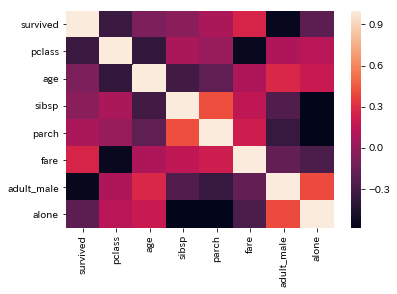

In [18]:
# ヒートマップで表示も可能
sns.heatmap(corr)

### 相関係数(の絶対値)が高い順に並べる

In [19]:
# 目的変数
target = 'survived'

In [20]:
# 相関係数の絶対値が高い順に並べる
corr0 = corr[[target]]
corr0['abs_corr'] = corr0[target].abs()
corr0 = corr0.sort_values(by='abs_corr', ascending=False)
corr0

D:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,survived,abs_corr
survived,1.000000,1.000000
adult_male,-0.557080,0.557080
pclass,-0.338481,0.338481
fare,0.257307,0.257307
alone,-0.203367,0.203367
parch,0.081629,0.081629
age,-0.077221,0.077221
sibsp,-0.035322,0.035322


以下2つは同じ
titanic_df['pclass']
titanic_df.pclass

## 度数を見てみる

### pclass

In [21]:
titanic_df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

### 性別

In [22]:
titanic_df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

## 各変数の尺度を確認することが重要

参考: http://www.gen-info.osaka-u.ac.jp/MEPHAS/express/express0.html  
  
- 順序尺度以上：順序尺度・間隔尺度・比例尺度のいずれかである場合です  
- 間隔尺度以上：間隔尺度・比例尺度のいずれかである場合です  
  
### 名義尺度
単に区別するために用いられている尺度。  
例えば、血液型でＡ型・Ｂ型・Ｏ型・ＡＢ型を、 それぞれ０・１・２・３と数値に対応させたもの。  
これらの変数の平均値を求めてもまったく意味がありません。  
  
### 順序尺度
大小関係にのみ意味がある尺度。  
例えば、治療効果の判定において、 悪化・不変・改善・著効を、それぞれ-１・０・１・２と数値に対応させたもの。  
平均値は定義できないが中央値は定義できます。  
  
### 間隔尺度
数値の差のみに意味がある尺度。  
「距離尺度」とも呼びます。順序尺度の性質も備えています。  
例えば、温度が10℃から15℃になったときに、50％の温度上昇があったとはいいません。 温度が10℃から15℃になったときも、100℃から105℃になったときも、 ともに５℃の温度上昇です。そして、５℃という数値には意味があります。  
  
### 比例尺度
数値の差とともに数値の比にも意味がある尺度。  
「比尺度」とも呼びます。順序尺度・間隔尺度の性質も備えています。  
例えば、体重は50kgから60kgになったときと、100kgから110kgになったときとは、 同じ10kgの増加であっても、前者は20％増、後者は10％増です。 また、比が定義できるということは絶対零点を持つことと同じことを表します。  

## Excelで保存してみる

to_excel(ファイル名, index=(indexをつけるかどうか))

In [23]:
titanic_path = input_path + 'titanic_df_190907.xlsx'

In [24]:
# 保存する
titanic_df.to_excel(titanic_path, index=False)

## Excelを読み込む

In [25]:
# 読み込む
nakami_df = pd.read_excel(titanic_path, index=False)
nakami_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


## 変数の概要を確認する

In [26]:
target

'survived'

In [27]:
var_info_df = check_var_info(nakami_df, target=target, file_name=titanic_path, filecol_is=True, transcol_is=True)
var_info_df

google translate error


D:\Programming\Python\GitHub\DataAnalysisTraining\201908\analysis\annnmods\analysis.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  target_corr_df[corr_cols[1]] = target_corr_df[target].apply(abs)


,file_name,var_name,var_name_ja,dtype,n_unique,major_vals,count_of_major,missing_rate,n_exist,n_missing,n_rows,mean,std,min,med,max,corr_with_target,abs_corr_with_target
0,../input/titanic_df_190907.xlsx,survived,translate error,int64,2,0,549,0.000000,891,0,891,0.383838,0.486592,0.00,0.0000,1.0000,1.000000,1.000000
1,../input/titanic_df_190907.xlsx,pclass,translate error,int64,3,3,491,0.000000,891,0,891,2.308642,0.836071,1.00,3.0000,3.0000,-0.338481,0.338481
2,../input/titanic_df_190907.xlsx,sex,translate error,object,2,male,577,0.000000,891,0,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,../input/titanic_df_190907.xlsx,age,translate error,float64,88,24.0,30,0.198653,714,177,891,29.699118,14.526497,0.42,28.0000,80.0000,-0.077221,0.077221
4,../input/titanic_df_190907.xlsx,sibsp,translate error,int64,7,0,608,0.000000,891,0,891,0.523008,1.102743,0.00,0.0000,8.0000,-0.035322,0.035322
5,../input/titanic_df_190907.xlsx,parch,translate error,int64,7,0,678,0.000000,891,0,891,0.381594,0.806057,0.00,0.0000,6.0000,0.081629,0.081629
6,../input/titanic_df_190907.xlsx,fare,translate error,float64,248,8.05,43,0.000000,891,0,891,32.204208,49.693429,0.00,14.4542,512.3292,0.257307,0.257307
7,../input/titanic_df_190907.xlsx,embarked,translate error,object,3,S,644,0.002245,889,2,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,../input/titanic_df_190907.xlsx,class,translate error,object,3,Third,491,0.000000,891,0,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,../input/titanic_df_190907.xlsx,who,translate error,object,3,man,537,0.000000,891,0,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# var_info_dfのカラム名を日本語にしたい場合
enja_dict = {
    'file_name': 'ファイル名',
    'var_name': '変数名',
    'var_name_ja': '変数名日本語訳',
    'dtype': 'データ型',
    'n_unique': '値の種類数',
    'major_vals': '最多数値',
    'count_of_major': '多数値レコード数',
    'missing_rate': '欠損率',
    'n_exist': '非欠損数',
    'n_missing': '欠損数',
    'n_rows': 'レコード数',
    'mean': '平均値',
    'std': '標準偏差',
    'min': '最小値',
    'med': '中央値',
    'max': '最大値',
    'corr_with_target': '目的変数との相関',
    'abs_corr_with_target': '目的変数との相関_絶対値'
}
var_info_df = var_info_df.rename(columns=enja_dict)
var_info_df

,ファイル名,変数名,変数名日本語訳,データ型,値の種類数,最多数値,多数値レコード数,欠損率,非欠損数,欠損数,レコード数,平均値,標準偏差,最小値,中央値,最大値,目的変数との相関,目的変数との相関_絶対値
0,../input/titanic_df_190907.xlsx,survived,translate error,int64,2,0,549,0.000000,891,0,891,0.383838,0.486592,0.00,0.0000,1.0000,1.000000,1.000000
1,../input/titanic_df_190907.xlsx,pclass,translate error,int64,3,3,491,0.000000,891,0,891,2.308642,0.836071,1.00,3.0000,3.0000,-0.338481,0.338481
2,../input/titanic_df_190907.xlsx,sex,translate error,object,2,male,577,0.000000,891,0,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,../input/titanic_df_190907.xlsx,age,translate error,float64,88,24.0,30,0.198653,714,177,891,29.699118,14.526497,0.42,28.0000,80.0000,-0.077221,0.077221
4,../input/titanic_df_190907.xlsx,sibsp,translate error,int64,7,0,608,0.000000,891,0,891,0.523008,1.102743,0.00,0.0000,8.0000,-0.035322,0.035322
5,../input/titanic_df_190907.xlsx,parch,translate error,int64,7,0,678,0.000000,891,0,891,0.381594,0.806057,0.00,0.0000,6.0000,0.081629,0.081629
6,../input/titanic_df_190907.xlsx,fare,translate error,float64,248,8.05,43,0.000000,891,0,891,32.204208,49.693429,0.00,14.4542,512.3292,0.257307,0.257307
7,../input/titanic_df_190907.xlsx,embarked,translate error,object,3,S,644,0.002245,889,2,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,../input/titanic_df_190907.xlsx,class,translate error,object,3,Third,491,0.000000,891,0,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,../input/titanic_df_190907.xlsx,who,translate error,object,3,man,537,0.000000,891,0,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# 出力してみる
var_info_df.to_excel(output_path + 'titanic_var_info.xlsx', index=False)

# Preprocessing

In [30]:
df = titanic_df.copy()
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [31]:
df.shape

(891, 15)

## leakage対策

leakageについて  
https://www.datarobot.com/jp/wiki/target-leakage/

### aliveがsurvivedの情報を含んでいるのでaliveカラムを削除

In [32]:
# 重複した行を削除
df[[target, 'alive']].drop_duplicates()

,survived,alive
0,0,no
1,1,yes


In [33]:
df = df.drop('alive', axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True


## 階級に分ける

### 階級に分けるカラムの指定

In [34]:
cls_cols = ['age', 'fare']

### 階級数をスタージェスの公式で計算

In [35]:
n_class = sturges_rule(len(df))
n_class

11

### 階級に分ける

In [36]:
df, bins = get_classes(
    in_df = df,
    columns = cls_cols,
    n_classes = n_class,
    drop = True
    )

In [37]:
df.head(3)

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,deck,embark_town,alone,age_band,fare_band
0,0,3,male,1,0,S,Third,man,True,NaN,Southampton,False,"(14.889, 22.124]","(-0.512, 46.575]"
1,1,1,female,1,0,C,First,woman,False,C,Cherbourg,False,"(36.593, 43.827]","(46.575, 93.151]"
2,1,3,female,0,0,S,Third,woman,False,NaN,Southampton,True,"(22.124, 29.358]","(-0.512, 46.575]"


In [38]:
# ちゃんと分けられてるか確認
pd.DataFrame(df.age_band.value_counts())

,age_band
"(22.124, 29.358]",153
"(14.889, 22.124]",153
"(29.358, 36.593]",136
"(36.593, 43.827]",70
"(43.827, 51.062]",67
"(0.34, 7.655]",50
"(51.062, 58.296]",29
"(7.655, 14.889]",28
"(58.296, 65.531]",20
"(65.531, 72.765]",6


In [39]:
cls_bins_cols = list(bins.keys())
cls_bins_cols

['age_band', 'fare_band']

## ダミー変数化

### カテゴリ変数のカラムの指定

In [40]:
var_name = '変数名'
n_unique = '値の種類数'
tmp = var_info_df[[var_name, n_unique]]
tmp = tmp[tmp[n_unique] <= 10]
tmp

,変数名,値の種類数
0,survived,2
1,pclass,3
2,sex,2
4,sibsp,7
5,parch,7
7,embarked,3
8,class,3
9,who,3
10,adult_male,2
11,deck,7


In [41]:
cate_cols = tmp[var_name].values.tolist()
cate_cols.remove('alive')
cate_cols.remove(target)

In [42]:
cate_cols += cls_bins_cols
cate_cols

['pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alone',
 'age_band',
 'fare_band']

### ダミー変数化

In [43]:
df.columns.tolist()

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alone',
 'age_band',
 'fare_band']

In [44]:
df = pd.get_dummies(df, dummy_na=True, columns=cate_cols)
df.head(3)

,survived,pclass_1.0,pclass_2.0,pclass_3.0,pclass_nan,sex_female,sex_male,sex_nan,sibsp_0.0,sibsp_1.0,sibsp_2.0,sibsp_3.0,sibsp_4.0,sibsp_5.0,sibsp_8.0,sibsp_nan,parch_0.0,parch_1.0,parch_2.0,parch_3.0,parch_4.0,parch_5.0,parch_6.0,parch_nan,embarked_C,embarked_Q,embarked_S,embarked_nan,class_First,class_Second,class_Third,class_nan,who_child,who_man,who_woman,who_nan,adult_male_False,adult_male_True,adult_male_nan,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alone_False,alone_True,alone_nan,"age_band_(0.34, 7.655]","age_band_(7.655, 14.889]","age_band_(14.889, 22.124]","age_band_(22.124, 29.358]","age_band_(29.358, 36.593]","age_band_(36.593, 43.827]","age_band_(43.827, 51.062]","age_band_(51.062, 58.296]","age_band_(58.296, 65.531]","age_band_(65.531, 72.765]","age_band_(72.765, 80.0]",age_band_nan,"fare_band_(-0.512, 46.575]","fare_band_(46.575, 93.151]","fare_band_(93.151, 139.726]","fare_band_(139.726, 186.302]","fare_band_(186.302, 232.877]","fare_band_(232.877, 279.452]","fare_band_(279.452, 326.028]","fare_band_(326.028, 372.603]","fare_band_(372.603, 419.178]","fare_band_(419.178, 465.754]","fare_band_(465.754, 512.329]",fare_band_nan
0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df.shape

(891, 78)

In [46]:
# カラムの確認
df.columns.tolist()

['survived',
 'pclass_1.0',
 'pclass_2.0',
 'pclass_3.0',
 'pclass_nan',
 'sex_female',
 'sex_male',
 'sex_nan',
 'sibsp_0.0',
 'sibsp_1.0',
 'sibsp_2.0',
 'sibsp_3.0',
 'sibsp_4.0',
 'sibsp_5.0',
 'sibsp_8.0',
 'sibsp_nan',
 'parch_0.0',
 'parch_1.0',
 'parch_2.0',
 'parch_3.0',
 'parch_4.0',
 'parch_5.0',
 'parch_6.0',
 'parch_nan',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'embarked_nan',
 'class_First',
 'class_Second',
 'class_Third',
 'class_nan',
 'who_child',
 'who_man',
 'who_woman',
 'who_nan',
 'adult_male_False',
 'adult_male_True',
 'adult_male_nan',
 'deck_A',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'deck_nan',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'embark_town_nan',
 'alone_False',
 'alone_True',
 'alone_nan',
 'age_band_(0.34, 7.655]',
 'age_band_(7.655, 14.889]',
 'age_band_(14.889, 22.124]',
 'age_band_(22.124, 29.358]',
 'age_band_(29.358, 36.593]',
 'age_band_(36.593, 43.827]',
 'age_band_(43

### まとめて前処理する場合

In [47]:
gc.collect()

154

## 改めてcheck var infoする

In [48]:
var_info_df0 = check_var_info(df, target=target, file_name=titanic_path, filecol_is=True, transcol_is=True)

# var_info_dfのカラム名を日本語にしたい場合
enja_dict = {
    'file_name': 'ファイル名',
    'var_name': '変数名',
    'var_name_ja': '変数名日本語訳',
    'dtype': 'データ型',
    'n_unique': '値の種類数',
    'major_vals': '最多数値',
    'count_of_major': '多数値レコード数',
    'missing_rate': '欠損率',
    'n_exist': '非欠損数',
    'n_missing': '欠損数',
    'n_rows': 'レコード数',
    'mean': '平均値',
    'std': '標準偏差',
    'min': '最小値',
    'med': '中央値',
    'max': '最大値',
    'corr_with_target': '目的変数との相関',
    'abs_corr_with_target': '目的変数との相関_絶対値'
}
var_info_df0 = var_info_df0.rename(columns=enja_dict)
var_info_df0

google translate error


D:\Programming\Python\GitHub\DataAnalysisTraining\201908\analysis\annnmods\analysis.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  target_corr_df[corr_cols[1]] = target_corr_df[target].apply(abs)


,ファイル名,変数名,変数名日本語訳,データ型,値の種類数,最多数値,多数値レコード数,欠損率,非欠損数,欠損数,レコード数,平均値,標準偏差,最小値,中央値,最大値,目的変数との相関,目的変数との相関_絶対値
0,../input/titanic_df_190907.xlsx,survived,translate error,int64,2,0,549,0.0,891,0,891,0.383838,0.486592,0.0,0.0,1.0,1.000000,1.000000
1,../input/titanic_df_190907.xlsx,pclass_1.0,translate error,uint8,2,0,675,0.0,891,0,891,0.242424,0.428790,0.0,0.0,1.0,0.285904,0.285904
2,../input/titanic_df_190907.xlsx,pclass_2.0,translate error,uint8,2,0,707,0.0,891,0,891,0.206510,0.405028,0.0,0.0,1.0,0.093349,0.093349
3,../input/titanic_df_190907.xlsx,pclass_3.0,translate error,uint8,2,1,491,0.0,891,0,891,0.551066,0.497665,0.0,1.0,1.0,-0.322308,0.322308
4,../input/titanic_df_190907.xlsx,pclass_nan,translate error,uint8,1,0,891,0.0,891,0,891,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
5,../input/titanic_df_190907.xlsx,sex_female,translate error,uint8,2,0,577,0.0,891,0,891,0.352413,0.477990,0.0,0.0,1.0,0.543351,0.543351
6,../input/titanic_df_190907.xlsx,sex_male,translate error,uint8,2,1,577,0.0,891,0,891,0.647587,0.477990,0.0,1.0,1.0,-0.543351,0.543351
7,../input/titanic_df_190907.xlsx,sex_nan,translate error,uint8,1,0,891,0.0,891,0,891,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN
8,../input/titanic_df_190907.xlsx,sibsp_0.0,translate error,uint8,2,1,608,0.0,891,0,891,0.682379,0.465813,0.0,1.0,1.0,-0.115867,0.115867
9,../input/titanic_df_190907.xlsx,sibsp_1.0,translate error,uint8,2,0,682,0.0,891,0,891,0.234568,0.423966,0.0,0.0,1.0,0.173076,0.173076


In [49]:
# 出力してみる
var_info_df0.to_excel(output_path + 'titanic_var_info0.xlsx', index=False)

## 目的変数と説明変数で分ける

In [50]:
df.columns.tolist()

['survived',
 'pclass_1.0',
 'pclass_2.0',
 'pclass_3.0',
 'pclass_nan',
 'sex_female',
 'sex_male',
 'sex_nan',
 'sibsp_0.0',
 'sibsp_1.0',
 'sibsp_2.0',
 'sibsp_3.0',
 'sibsp_4.0',
 'sibsp_5.0',
 'sibsp_8.0',
 'sibsp_nan',
 'parch_0.0',
 'parch_1.0',
 'parch_2.0',
 'parch_3.0',
 'parch_4.0',
 'parch_5.0',
 'parch_6.0',
 'parch_nan',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'embarked_nan',
 'class_First',
 'class_Second',
 'class_Third',
 'class_nan',
 'who_child',
 'who_man',
 'who_woman',
 'who_nan',
 'adult_male_False',
 'adult_male_True',
 'adult_male_nan',
 'deck_A',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'deck_nan',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'embark_town_nan',
 'alone_False',
 'alone_True',
 'alone_nan',
 'age_band_(0.34, 7.655]',
 'age_band_(7.655, 14.889]',
 'age_band_(14.889, 22.124]',
 'age_band_(22.124, 29.358]',
 'age_band_(29.358, 36.593]',
 'age_band_(36.593, 43.827]',
 'age_band_(43

In [51]:
ignore_cols = [target]
ignore_cols

['survived']

In [52]:
data_x = df.drop(labels=ignore_cols, axis=1)
data_y = df[target]

## trainとtestに分割

In [53]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, random_state=57, test_size=0.3)

In [54]:
train_x.head()

,pclass_1.0,pclass_2.0,pclass_3.0,pclass_nan,sex_female,sex_male,sex_nan,sibsp_0.0,sibsp_1.0,sibsp_2.0,sibsp_3.0,sibsp_4.0,sibsp_5.0,sibsp_8.0,sibsp_nan,parch_0.0,parch_1.0,parch_2.0,parch_3.0,parch_4.0,parch_5.0,parch_6.0,parch_nan,embarked_C,embarked_Q,embarked_S,embarked_nan,class_First,class_Second,class_Third,class_nan,who_child,who_man,who_woman,who_nan,adult_male_False,adult_male_True,adult_male_nan,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alone_False,alone_True,alone_nan,"age_band_(0.34, 7.655]","age_band_(7.655, 14.889]","age_band_(14.889, 22.124]","age_band_(22.124, 29.358]","age_band_(29.358, 36.593]","age_band_(36.593, 43.827]","age_band_(43.827, 51.062]","age_band_(51.062, 58.296]","age_band_(58.296, 65.531]","age_band_(65.531, 72.765]","age_band_(72.765, 80.0]",age_band_nan,"fare_band_(-0.512, 46.575]","fare_band_(46.575, 93.151]","fare_band_(93.151, 139.726]","fare_band_(139.726, 186.302]","fare_band_(186.302, 232.877]","fare_band_(232.877, 279.452]","fare_band_(279.452, 326.028]","fare_band_(326.028, 372.603]","fare_band_(372.603, 419.178]","fare_band_(419.178, 465.754]","fare_band_(465.754, 512.329]",fare_band_nan
176,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
255,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
791,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
581,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
228,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
print('train_x.shape:', train_x.shape)
print('test_x.shape:', test_x.shape)
print('train_y.shape:', train_y.shape)
print('test_y.shape:', test_y.shape)

train_x.shape: (623, 77)
test_x.shape: (268, 77)
train_y.shape: (623,)
test_y.shape: (268,)


# RandomForest

## create model

In [56]:
rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=11, min_samples_leaf=5, n_estimators=100, random_state=57)
rfc.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=57, verbose=0,
                       warm_start=False)

## 寄与度分析

In [57]:
# 説明変数
features = train_x.columns

# 寄与率
importances = rfc.feature_importances_

,feature,importance
36,adult_male_True,0.143878
33,who_woman,0.125630
4,sex_female,0.112361
35,adult_male_False,0.094566
32,who_man,0.079830
5,sex_male,0.058931
29,class_Third,0.047656
2,pclass_3.0,0.040423
27,class_First,0.028340
28,class_Second,0.020896


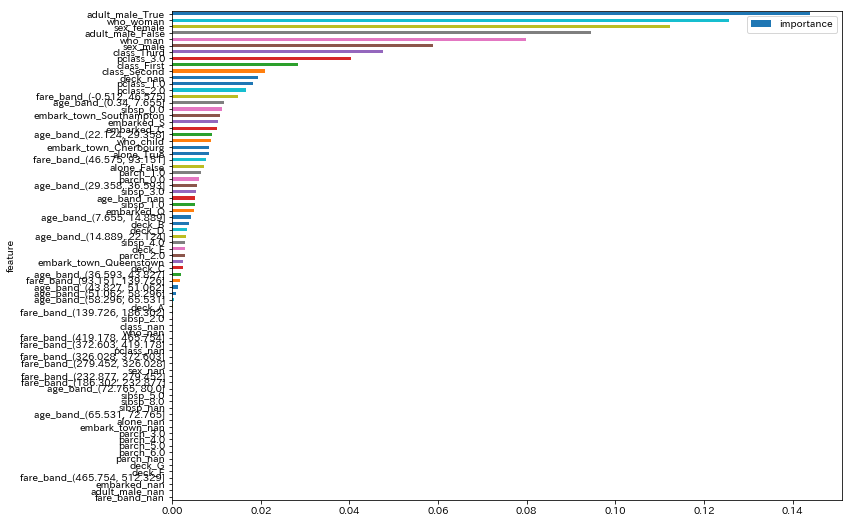

In [58]:
# importances描き方
importance_df = pd.DataFrame({'feature': features, 'importance':  importances})
importance_df.sort_values(by='importance', ascending=True).plot(x='feature',y='importance',kind='barh',figsize=(12,9))
display(importance_df.sort_values(by='importance', ascending=False))

## 木の一つを可視化する

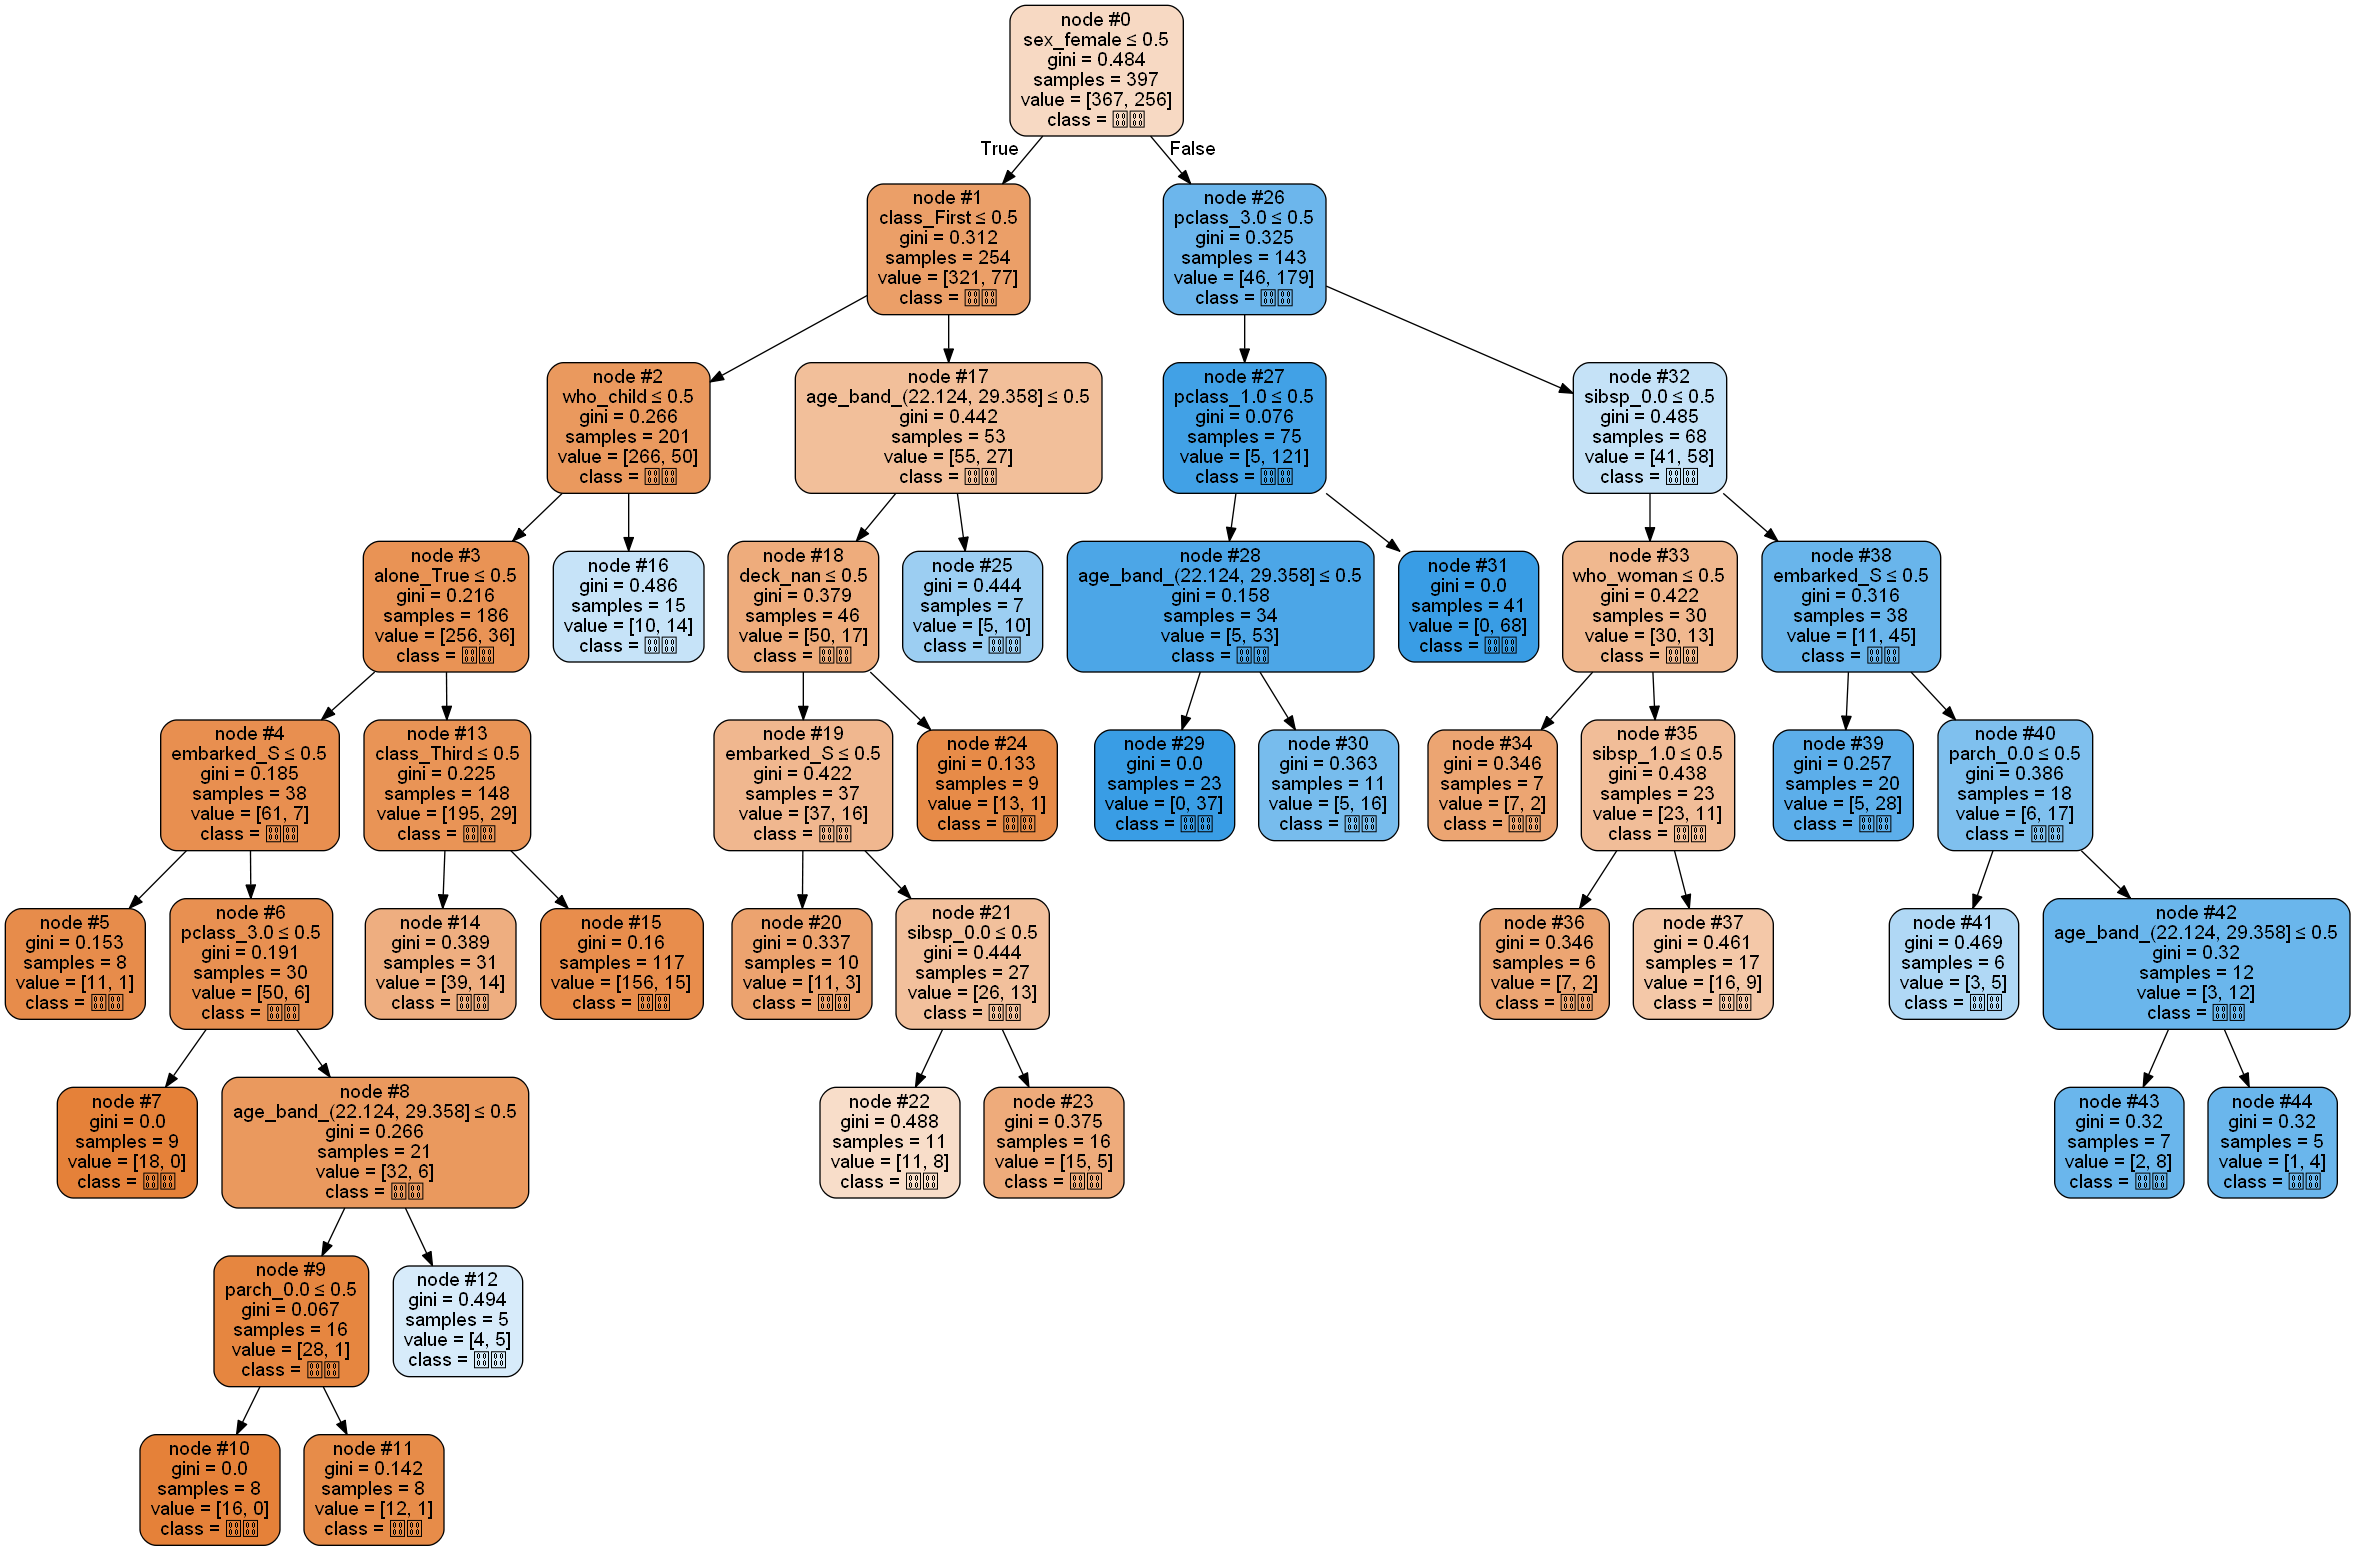

In [59]:
# 試しに木の一つを視覚化する
estimators = rfc.estimators_
file_name = output_path + 'titanic_rfc_tree_0.png'
dot_data = tree.export_graphviz(estimators[0], # 決定木オブジェクトを一つ指定する
                                out_file=None, # ファイルは介さずにGraphvizにdot言語データを渡すのでNone
                                filled=True, # Trueにすると、分岐の際にどちらのノードに多く分類されたのか色で示してくれる
                                node_ids=True, # ノード番号出力?
                                # proportion=True, # パーセンテージ表記
                                rounded=True, # Trueにすると、ノードの角を丸く描画する。
                                feature_names=features, # これを指定しないとチャート上で特徴量の名前が表示されない
                                class_names=['死亡', '生存'], # これを指定しないとチャート上で分類名が表示されない
                                special_characters=True # 特殊文字を扱えるようにする
                                )
graph = pdp.graph_from_dot_data(dot_data)

# 木を画像ファイルとして出力
graph.write_png(file_name)

# 木を表示する
Image(file_name)

## 評価

機械学習の評価指標  
https://data.gunosy.io/entry/2016/08/05/115345

In [60]:
# trainの評価
pred_train_y = rfc.predict(train_x)
prob_train_y = rfc.predict_proba(train_x)

print('--------------------------------------------------------------------------')
print('train評価')
train_score_df, train_cm_df = print_clf_score(train_y, pred_train_y)

print('--------------------------------------------------------------------------')

# testの評価
pred_test_y = rfc.predict(test_x)
prob_test_y = rfc.predict_proba(test_x)

print('test評価')
test_score_df, test_cm_df = print_clf_score(test_y, pred_test_y)
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
train評価
正解率: 0.84
f1: 0.77
適合率(precision): 0.86
再現率(recall): 0.71
log loss: 5.49
ROC AUC: 0.82
--------------------------------------------------------------------------
test評価
正解率: 0.82
f1: 0.74
適合率(precision): 0.82
再現率(recall): 0.67
log loss: 6.19
ROC AUC: 0.79
--------------------------------------------------------------------------


In [61]:
train_score_df

,Accuracy,F-measure,Precision,Recall,Log_Loss,ROC_AUC
0,0.841091,0.774487,0.858586,0.705394,5.488541,0.816048


In [62]:
test_score_df

,Accuracy,F-measure,Precision,Recall,Log_Loss,ROC_AUC
0,0.820896,0.73913,0.819277,0.673267,6.186094,0.791723


## 混同行列

In [63]:
pd.DataFrame(train_cm_df)

,0,1
0,354,71
1,28,170


In [64]:
pd.DataFrame(test_cm_df)

,0,1
0,152,33
1,15,68


## 結果をまとめたdfを作成

### result_dfの作成

In [65]:
result_df = test_x.copy()
result_df[target] = test_y
result_df['pred_y'] = pred_test_y
result_df['pred_prob'] = prob_test_y.T[1]

result_df.head()

,pclass_1.0,pclass_2.0,pclass_3.0,pclass_nan,sex_female,sex_male,sex_nan,sibsp_0.0,sibsp_1.0,sibsp_2.0,sibsp_3.0,sibsp_4.0,sibsp_5.0,sibsp_8.0,sibsp_nan,parch_0.0,parch_1.0,parch_2.0,parch_3.0,parch_4.0,parch_5.0,parch_6.0,parch_nan,embarked_C,embarked_Q,embarked_S,embarked_nan,class_First,class_Second,class_Third,class_nan,who_child,who_man,who_woman,who_nan,adult_male_False,adult_male_True,adult_male_nan,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alone_False,alone_True,alone_nan,"age_band_(0.34, 7.655]","age_band_(7.655, 14.889]","age_band_(14.889, 22.124]","age_band_(22.124, 29.358]","age_band_(29.358, 36.593]","age_band_(36.593, 43.827]","age_band_(43.827, 51.062]","age_band_(51.062, 58.296]","age_band_(58.296, 65.531]","age_band_(65.531, 72.765]","age_band_(72.765, 80.0]",age_band_nan,"fare_band_(-0.512, 46.575]","fare_band_(46.575, 93.151]","fare_band_(93.151, 139.726]","fare_band_(139.726, 186.302]","fare_band_(186.302, 232.877]","fare_band_(232.877, 279.452]","fare_band_(279.452, 326.028]","fare_band_(326.028, 372.603]","fare_band_(372.603, 419.178]","fare_band_(419.178, 465.754]","fare_band_(465.754, 512.329]",fare_band_nan,survived,pred_y,pred_prob
561,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.113098
713,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.161683
29,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.109182
120,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.149392
523,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.974113


In [66]:
result_df.shape

(268, 80)

In [67]:
def result_to_unique(result_df, cols_list):
    
    cols_df_list = []
    for col in cols_list:
        cols_df_list.append(result_df[col])
    
    cross_df = pd.crosstab(margins=True, index=cols_df_list, columns=all).reset_index()
    cross_df = cross_df[cols_list + ['All']].rename(columns={'All': 'count'})
    
    del cross_df.columns.name # indexを直す
    cross_df[cols_list] = cross_df[cols_list].astype(str) # 型をstrにする
    
    
    # uniqueのlistを作る
    unique_df = result_df.drop_duplicates(subset=cols_list)
    
    unique_df[cols_list] = unique_df[cols_list].astype(str) # 型をstrにする
    
    # マージする
    out_df = pd.merge(unique_df, cross_df, on=cols_list, how='left')
    
    # ソート
    out_df = out_df.sort_values(by=['pred_prob', 'count'], ascending=[False, False]).reset_index(drop=True)
    out_df['count_累積和'] = np.cumsum(out_df['count'].values)
    out_df['count_累積比'] = out_df['count_累積和'] / out_df['count'].values.sum()
    
    return out_df

In [68]:
# 自作関数を使って、uniqueにした上、集計する
unique_df = result_to_unique(result_df, features.tolist())
unique_df

D:\Programming\Anaconda\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,pclass_1.0,pclass_2.0,pclass_3.0,pclass_nan,sex_female,sex_male,sex_nan,sibsp_0.0,sibsp_1.0,sibsp_2.0,sibsp_3.0,sibsp_4.0,sibsp_5.0,sibsp_8.0,sibsp_nan,parch_0.0,parch_1.0,parch_2.0,parch_3.0,parch_4.0,parch_5.0,parch_6.0,parch_nan,embarked_C,embarked_Q,embarked_S,embarked_nan,class_First,class_Second,class_Third,class_nan,who_child,who_man,who_woman,who_nan,adult_male_False,adult_male_True,adult_male_nan,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alone_False,alone_True,alone_nan,"age_band_(0.34, 7.655]","age_band_(7.655, 14.889]","age_band_(14.889, 22.124]","age_band_(22.124, 29.358]","age_band_(29.358, 36.593]","age_band_(36.593, 43.827]","age_band_(43.827, 51.062]","age_band_(51.062, 58.296]","age_band_(58.296, 65.531]","age_band_(65.531, 72.765]","age_band_(72.765, 80.0]",age_band_nan,"fare_band_(-0.512, 46.575]","fare_band_(46.575, 93.151]","fare_band_(93.151, 139.726]","fare_band_(139.726, 186.302]","fare_band_(186.302, 232.877]","fare_band_(232.877, 279.452]","fare_band_(279.452, 326.028]","fare_band_(326.028, 372.603]","fare_band_(372.603, 419.178]","fare_band_(419.178, 465.754]","fare_band_(465.754, 512.329]",fare_band_nan,survived,pred_y,pred_prob,count,count_累積和,count_累積比
0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.976894,1,1,0.003731
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.974113,1,2,0.007463
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.961226,1,3,0.011194
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.960826,1,4,0.014925
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.960001,1,5,0.018657
5,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.954181,1,6,0.022388
6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.953766,1,7,0.026119
7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.951625,1,8,0.029851
8,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.951456,1,9,0.033582
9,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.950238,1,10,0.037313


In [69]:
# 見やすくする
unique_df['summary'] = unique_df.apply(lambda row: extract_isone(row, features.tolist()), axis=1)
unique_df

,pclass_1.0,pclass_2.0,pclass_3.0,pclass_nan,sex_female,sex_male,sex_nan,sibsp_0.0,sibsp_1.0,sibsp_2.0,sibsp_3.0,sibsp_4.0,sibsp_5.0,sibsp_8.0,sibsp_nan,parch_0.0,parch_1.0,parch_2.0,parch_3.0,parch_4.0,parch_5.0,parch_6.0,parch_nan,embarked_C,embarked_Q,embarked_S,embarked_nan,class_First,class_Second,class_Third,class_nan,who_child,who_man,who_woman,who_nan,adult_male_False,adult_male_True,adult_male_nan,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alone_False,alone_True,alone_nan,"age_band_(0.34, 7.655]","age_band_(7.655, 14.889]","age_band_(14.889, 22.124]","age_band_(22.124, 29.358]","age_band_(29.358, 36.593]","age_band_(36.593, 43.827]","age_band_(43.827, 51.062]","age_band_(51.062, 58.296]","age_band_(58.296, 65.531]","age_band_(65.531, 72.765]","age_band_(72.765, 80.0]",age_band_nan,"fare_band_(-0.512, 46.575]","fare_band_(46.575, 93.151]","fare_band_(93.151, 139.726]","fare_band_(139.726, 186.302]","fare_band_(186.302, 232.877]","fare_band_(232.877, 279.452]","fare_band_(279.452, 326.028]","fare_band_(326.028, 372.603]","fare_band_(372.603, 419.178]","fare_band_(419.178, 465.754]","fare_band_(465.754, 512.329]",fare_band_nan,survived,pred_y,pred_prob,count,count_累積和,count_累積比,summary
0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.976894,1,1,0.003731,"([pclass_1.0, sex_female, sibsp_0.0, parch_0.0, embarked_C, class_First, who_woman, adult_male_F..."
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.974113,1,2,0.007463,"([pclass_1.0, sex_female, sibsp_0.0, parch_1.0, embarked_C, class_First, who_woman, adult_male_F..."
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.961226,1,3,0.011194,"([pclass_1.0, sex_female, sibsp_1.0, parch_0.0, embarked_C, class_First, who_woman, adult_male_F..."
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.960826,1,4,0.014925,"([pclass_1.0, sex_female, sibsp_0.0, parch_1.0, embarked_C, class_First, who_woman, adult_male_F..."
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.960001,1,5,0.018657,"([pclass_1.0, sex_female, sibsp_0.0, parch_0.0, embarked_C, class_First, who_woman, adult_male_F..."
5,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.954181,1,6,0.022388,"([pclass_2.0, sex_female, sibsp_0.0, parch_0.0, embarked_S, class_Second, who_woman, adult_male_..."
6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.953766,1,7,0.026119,"([pclass_1.0, sex_female, sibsp_1.0, parch_0.0, embarked_C, class_First, who_woman, adult_male_F..."
7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.951625,1,8,0.029851,"([pclass_1.0, sex_female, sibsp_1.0, parch_0.0, embarked_C, class_First, who_woman, adult_male_F..."
8,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.951456,1,9,0.033582,"([pclass_1.0, sex_female, sibsp_1.0, parch_1.0, embarked_C, class_First, who_woman, adult_male_F..."
9,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1

# メモリ使用チェック

In [70]:
mem_cols = ['Variable Name', 'Memory']
memory_df = pd.DataFrame(columns=mem_cols)

for var_name in dir():
    if not var_name.startswith("_"):
        memory_df = memory_df.append(pd.DataFrame([[var_name, sys.getsizeof(eval(var_name))]], columns=mem_cols))

memory_df = memory_df.sort_values(by='Memory', ascending=False).reset_index(drop=True)
display(memory_df)

,Variable Name,Memory
0,unique_df,784768
1,nakami_df,412025
2,titanic_df,324800
3,df,75839
4,data_x,68711
5,train_x,52979
6,var_info_df0,46649
7,result_df,29236
8,test_x,22804
9,dot_data,13202
